In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [61]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "./dataset",
  validation_split=0.1,
  subset="training",
  seed=1,
  batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "./dataset",
  validation_split=0.1,
  subset="validation",
  seed=1,
  batch_size=32)
  
class_names = train_ds.class_names
print(class_names)

Found 948 files belonging to 2 classes.
Using 854 files for training.
Found 948 files belonging to 2 classes.
Using 94 files for validation.
['attractive', 'not-attractive']


In [63]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [65]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(500, 500),
  layers.experimental.preprocessing.Rescaling(1./255)
])


In [103]:

model = Sequential([
  resize_and_rescale,
  layers.Conv2D(2, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])

In [104]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [105]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
27/27 [==============================] - 3s 82ms/step - loss: 0.6044 - accuracy: 0.7447 - val_loss: 0.5358 - val_accuracy: 0.7766
Epoch 2/10
27/27 [==============================] - 2s 76ms/step - loss: 0.5392 - accuracy: 0.7670 - val_loss: 0.4490 - val_accuracy: 0.7766
Epoch 3/10
27/27 [==============================] - 2s 76ms/step - loss: 0.3651 - accuracy: 0.7892 - val_loss: 0.2215 - val_accuracy: 0.9149
Epoch 4/10
27/27 [==============================] - 2s 76ms/step - loss: 0.2349 - accuracy: 0.9005 - val_loss: 0.0936 - val_accuracy: 0.9894
Epoch 5/10
27/27 [==============================] - 2s 76ms/step - loss: 0.1735 - accuracy: 0.9321 - val_loss: 0.0962 - val_accuracy: 0.9894
Epoch 6/10
27/27 [==============================] - 2s 76ms/step - loss: 0.1395 - accuracy: 0.9391 - val_loss: 0.0619 - val_accuracy: 0.9894
Epoch 7/10
27/27 [==============================] - 2s 76ms/step - loss: 0.1218 - accuracy: 0.9450 - val_loss: 0.0510 - val_accuracy: 0.9894
Epoch 8/10
27

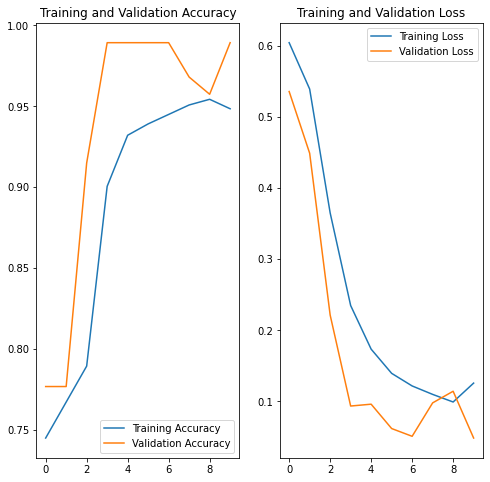

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [107]:
path = r"C:\Users\Tyler Kowalski\Desktop\testimg.jpg"
test_image = keras.preprocessing.image.load_img(path)
img_array = keras.preprocessing.image.img_to_array(test_image)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This person is most likely {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This person is most likely not-attractive with a 100.00 percent confidence.
